In [2]:
import os
import mne
subjects_dir = "/Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects"


In [2]:
Brain = mne.viz.get_brain_class()
brain = Brain(
    "sub-01", hemi="both", surf="pial", subjects_dir=subjects_dir, size=(800, 600)
)
brain.add_annotation("aparc.a2009s", borders=False)



Using notebook 3d backend.



/opt/homebrew/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:41: PyVistaDeprecationWarning: `ipyvtklink` backend is deprecated and has been replaced by the `trame` backend.
  warnings.warn(


In [2]:
subject = "sub-01"
fname_raw = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/sub-01/ses-meg/meg", f"{subject}_ses-meg_task-facerecognition_run-01_meg.fif")
info = mne.io.read_info(fname_raw)
plot_kwargs = dict(
    subject=subject,
    subjects_dir=subjects_dir,
    surfaces="auto",
    dig=True,
    eeg=[],
    meg="sensors",
    show_axes=True,
    coord_frame="meg",
)
# view_kwargs = dict(azimuth=45, elevation=45, distance=0.2, focalpoint=(0.0, 0.0, 0.0))

    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle


In [4]:
view_kwargs = dict(azimuth=45, elevation=90, distance=0.6, focalpoint=(0.0, 0.0, 0.0))

In [5]:
fiducials = "estimated"  # get fiducials from fsaverage
coreg = mne.coreg.Coregistration(info, subject, subjects_dir, fiducials=fiducials)
fig = mne.viz.plot_alignment(info, trans=coreg.trans, **plot_kwargs)

    Triangle neighbors and vertex normals...
Using low resolution head model in /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/sub-01/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Estimating fiducials from fsaverage.
Using outer_skin.surf for head surface.
Channel types::	grad: 204, mag: 102


/opt/homebrew/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:41: PyVistaDeprecationWarning: `ipyvtklink` backend is deprecated and has been replaced by the `trame` backend.
  warnings.warn(


In [6]:
coreg.fit_fiducials(verbose=True)

Aligning using fiducials
Start median distance:  32.04 mm
End   median distance:   5.34 mm


In [9]:
# fig = mne.viz.plot_alignment(info, trans=coreg.trans, **plot_kwargs)

In [10]:
coreg.fit_icp(n_iterations=6, nasion_weight=2.0, verbose=True)
# fig = mne.viz.plot_alignment(info, trans=coreg.trans, **plot_kwargs)

Aligning using ICP
Start     median distance:   8.16 mm
  ICP  1  median distance:   7.88 mm
  ICP  2  median distance:   7.56 mm
  ICP  3  median distance:   7.34 mm
  ICP  4  median distance:   6.88 mm
  ICP  5  median distance:   6.87 mm
  ICP  6  median distance:   6.81 mm
End       median distance:   6.81 mm


In [11]:
coreg.omit_head_shape_points(distance=5.0 / 1000)  # distance is in meters

Coregistration: Excluding 37 head shape points with distance >= 0.005 m.


In [12]:
import numpy as np

In [14]:
coreg.fit_icp(n_iterations=20, nasion_weight=10.0, verbose=True)
# fig = mne.viz.plot_alignment(info, trans=coreg.trans, **plot_kwargs)
# mne.viz.set_3d_view(fig, **view_kwargs)

# dists = coreg.compute_dig_mri_distances() * 1e3  # in mm
# print(
#     f"Distance between HSP and MRI (mean/min/max):\n{np.mean(dists):.2f} mm "
#     f"/ {np.min(dists):.2f} mm / {np.max(dists):.2f} mm"
# )

Aligning using ICP
Start     median distance:   3.94 mm
  ICP  1  median distance:   3.97 mm
End       median distance:   3.97 mm


In [15]:
fname_raw = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/")
mne.write_trans(f'/Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/{subject}/{subject}-trans.fif', coreg.trans, overwrite=True)

Overwriting existing file.


In [16]:
plot_bem_kwargs = dict(
    subject=subject,
    subjects_dir=subjects_dir,
    brain_surfaces="white",
    orientation="coronal",
    slices=[50, 100, 150, 200],
)

# mne.viz.plot_bem(**plot_bem_kwargs)



In [18]:
# mne.viz.plot_alignment(
#     info,
#     coreg.trans,
#     subject=subject,
#     dig=True,
#     meg=["helmet", "sensors"],
#     subjects_dir=subjects_dir,
#     surfaces="auto",
# )



In [19]:
spacing = "oct6"
fname_src = os.path.join(subjects_dir, subject, 'bem', f'{subject}-{spacing}-src.fif')


In [20]:
src = mne.read_source_spaces(fname_src)

    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read


In [21]:
# mne.viz.plot_bem(src=src, **plot_bem_kwargs)

In [22]:
# fig = mne.viz.plot_alignment(
#     subject=subject,
#     subjects_dir=subjects_dir,
#     surfaces="white",
#     coord_frame="mri",
#     src=src,
# )
# mne.viz.set_3d_view(
#     fig,
#     azimuth=173.78,
#     elevation=101.75,
#     distance=0.30,
#     focalpoint=(-0.03, -0.01, 0.03),
# )

In [23]:

fname_ave = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01", 'sub-01-tsss_10_Fam-epo.fif')
fname_fwd = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01", f'{subject}-meg-eeg-{spacing}-fwd.fif' )
fname_trans = f'/Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/{subject}/{subject}-trans.fif'
fname_src = os.path.join(subjects_dir, subject, 'bem', f'{subject}-{spacing}-src.fif')
# Here we only use 1-layer BEM because the 3-layer is unreliable
fname_bem = os.path.join(subjects_dir, subject, 'bem', f'{subject}-5120-bem-sol.fif')
mindist = 5
info = mne.io.read_info(fname_ave)
# Because we use a 1-layer BEM, we do MEG only
fwd = mne.make_forward_solution(info, fname_trans, fname_src, fname_bem,
                                meg=True, eeg=False, mindist=mindist)
mne.write_forward_solution(fname_fwd, fwd, overwrite=True)


Source space          : /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/sub-01/bem/sub-01-oct6-src.fif
MRI -> head transform : /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/sub-01/sub-01-trans.fif
Measurement data      : instance of Info
Conductor model   : /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/sub-01/bem/sub-01-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/sub-01/bem/sub-01-oct6-src.fif...
Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.998770 -0.030739 -0.038917       3.72 mm
     0.048623  0.761349  0.646516      40.05 mm
     0.009756 -0.647613  0.761907      29.39 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     0.999011  0.015276  0.041760       

In [24]:
fname_fwd = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01", f'{subject}-meg-eeg-{spacing}-fwd.fif' )
fwd=mne.read_forward_solution(fname_fwd)


Reading forward solution from /Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01/sub-01-meg-eeg-oct6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (8195 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [25]:
print(f"Before: {src}")
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=133644, n_used=4098>, <surface (rh), n_vertices=133973, n_used=4098>] MRI (surface RAS) coords, subject 'sub-01', ~23.7 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=133644, n_used=4097>, <surface (rh), n_vertices=133973, n_used=4098>] head coords, subject 'sub-01', ~26.8 MB>


In [26]:
leadfield = fwd["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

Leadfield size : 306 sensors x 24585 dipoles


In [27]:
fname_epo = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01", 'sub-01-tsss_10_Fam-epo.fif')
fname_cov = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01", 'sub-01-tsss_10_Fam-cov.fif')


In [28]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse, apply_inverse_epochs

In [29]:
from sklearn.model_selection import KFold
epochs = mne.read_epochs(fname_epo, preload=True)
cv = KFold(3)  # make sure cv is deterministic
cov = mne.compute_covariance(epochs, tmax=0, method='shrunk', cv=cv)
cov.save(fname_cov, overwrite=True)


Reading /Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01/sub-01-tsss_10_Fam-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated


/var/folders/dy/yqsbvh6j7r7gz1ktnr8gx4g80000gn/T/ipykernel_4771/1979967085.py:4: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  cov = mne.compute_covariance(epochs, tmax=0, method='shrunk', cv=cv)


Computing rank from data with rank=None


/var/folders/dy/yqsbvh6j7r7gz1ktnr8gx4g80000gn/T/ipykernel_4771/1979967085.py:4: RuntimeWarning: Too few samples (required : 1535 got : 150), covariance estimate may be unreliable
  cov = mne.compute_covariance(epochs, tmax=0, method='shrunk', cv=cv)


    Using tolerance 6.4e-10 (2.2e-16 eps * 150 dim * 1.9e+04  max singular value)
    Estimated rank (mag + grad): 150
    MEG: rank 150 computed from 306 data channels with 0 projectors


/var/folders/dy/yqsbvh6j7r7gz1ktnr8gx4g80000gn/T/ipykernel_4771/1979967085.py:4: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (150 > 71). Consider setting rank to "auto" or setting it explicitly as an integer.
  cov = mne.compute_covariance(epochs, tmax=0, method='shrunk', cv=cv)


    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 306 -> 150
Estimating covariance using SHRUNK
Done.
Number of samples used : 150
[done]
Overwriting existing file.


In [30]:
# cov.plot(epochs.info, proj=True)

In [29]:
evoked = epochs.average().pick("meg")


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [31]:
fname_inv = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01", f"sub-01-tsss_10_Fam-meg-eeg-{spacing}-inv.fif")
inverse_operator = mne.minimum_norm.read_inverse_operator(fname_inv)


Reading inverse operator decomposition from /Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01/sub-01-tsss_10_Fam-meg-eeg-oct6-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    306 x 306 full covariance (kind = 1) found.
    Noise covariance matrix read.
    24585 x 24585 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    24585 x 24585 diagonal covariance (kind = 6) found.
    Orientation priors read.
    24585 x 24585 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Source spaces transformed to the inverse soluti

In [32]:
fname_inv = os.path.join("/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01", f"sub-01-tsss_10_Fam-meg-eeg-{spacing}-inv.fif")

info = epochs.info
inverse_operator = make_inverse_operator(
    info, fwd, cov, loose=0.2, depth=0.8)



Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 306 channels.
    306 out of 306 channels remain after picking
Selected 306 channels
Creating the depth weighting matrix...
    204 planar channels
    limit = 7910/8195 = 10.003280
    scale = 1.76325e-08 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
Computing rank from covariance with rank=None
    Using tolerance 8.8e-13 (2.2e-16 eps * 306 dim * 13  max singular value)
    Estimated rank (mag + grad): 150
    MEG: rank 150 computed from 306 data channels with 0 projectors
    Setting small MEG eigenvalues to zero (without PCA)


/var/folders/dy/yqsbvh6j7r7gz1ktnr8gx4g80000gn/T/ipykernel_4771/90537108.py:4: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (150 > 71). Consider setting rank to "auto" or setting it explicitly as an integer.
  inverse_operator = make_inverse_operator(
/var/folders/dy/yqsbvh6j7r7gz1ktnr8gx4g80000gn/T/ipykernel_4771/90537108.py:4: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (150 > 71). Consider setting rank to "auto" or setting it explicitly as an integer.
  inverse_operator = make_inverse_operator(


Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 5.85348
    scaling factor to adjust the trace = 4.83577e+19 (nchan = 306 nzero = 156)


In [37]:
mne.minimum_norm.read_inverse_operator(fname_inv)

Reading inverse operator decomposition from /Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01/sub-01-tsss_10_Fam-meg-eeg-oct6-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    306 x 306 full covariance (kind = 1) found.
    Noise covariance matrix read.
    24585 x 24585 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    24585 x 24585 diagonal covariance (kind = 6) found.
    Orientation priors read.
    24585 x 24585 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Source spaces transformed to the inverse soluti

Channels,"306 MEG, 0 EEG"
Source space,surface with 8195 sources
Source orientation,Loose (0.2)


: 

In [33]:
method = "MNE"
snr = 3.0
lambda2 = 1.0 / snr**2
stc= apply_inverse_epochs(
    epochs,
    inverse_operator,
    lambda2,
    method=method,
    pick_ori='vector',
    verbose=True,
)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 150 (156 small eigenvalues omitted)
Picked 306 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 150
Processing epoch : 2 / 150
Processing epoch : 3 / 150
Processing epoch : 4 / 150
Processing epoch : 5 / 150
Processing epoch : 6 / 150
Processing epoch : 7 / 150
Processing epoch : 8 / 150
Processing epoch : 9 / 150
Processing epoch : 10 / 150
Processing epoch : 11 / 150
Processing epoch : 12 / 150
Processing epoch : 13 / 150
Processing epoch : 14 / 150
Processing epoch : 15 / 150
Processing epoch : 16 / 150
Processing epoch : 17 / 150
Processing epoch : 18 / 150
Processing epoch : 19 / 150
Processing epoch : 20 / 150
Processing epoch : 21 / 150
Processing epoch : 22

In [34]:
stc

[<VectorSourceEstimate | 8195 vertices, subject : sub-01, tmin : 0.0 (ms), tmax : 800.0 (ms), tstep : 0.9090909090909091 (ms), data shape : (8195, 3, 881), ~165.3 MB>,
 <VectorSourceEstimate | 8195 vertices, subject : sub-01, tmin : 0.0 (ms), tmax : 800.0 (ms), tstep : 0.9090909090909091 (ms), data shape : (8195, 3, 881), ~165.3 MB>,
 <VectorSourceEstimate | 8195 vertices, subject : sub-01, tmin : 0.0 (ms), tmax : 800.0 (ms), tstep : 0.9090909090909091 (ms), data shape : (8195, 3, 881), ~165.3 MB>,
 <VectorSourceEstimate | 8195 vertices, subject : sub-01, tmin : 0.0 (ms), tmax : 800.0 (ms), tstep : 0.9090909090909091 (ms), data shape : (8195, 3, 881), ~165.3 MB>,
 <VectorSourceEstimate | 8195 vertices, subject : sub-01, tmin : 0.0 (ms), tmax : 800.0 (ms), tstep : 0.9090909090909091 (ms), data shape : (8195, 3, 881), ~165.3 MB>,
 <VectorSourceEstimate | 8195 vertices, subject : sub-01, tmin : 0.0 (ms), tmax : 800.0 (ms), tstep : 0.9090909090909091 (ms), data shape : (8195, 3, 881), ~165

In [33]:
kwargs = dict(
    initial_time=0.0,
    hemi="both",
    subjects_dir=subjects_dir,
    size=(600, 600),
    clim=dict(kind="percent", lims=[90, 95, 99]),
    smoothing_steps=7,
)

brain = stc.plot(figure=51, **kwargs)
brain.add_text(0.1, 0.9, "MNE", "title", font_size=14)

Using control points [2.34665444e-11 2.94296021e-11 4.41489883e-11]


/opt/homebrew/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:41: PyVistaDeprecationWarning: `ipyvtklink` backend is deprecated and has been replaced by the `trame` backend.
  warnings.warn(


<IPython.core.display.Javascript object>

In [26]:
kwargs = dict(
    initial_time=0.0,
    hemi="both",
    subjects_dir=subjects_dir,
    size=(600, 600),
    clim=dict(kind="percent", lims=[90, 95, 99]),
    smoothing_steps=7,
)

brain = stc.plot(figure=51, **kwargs)
brain.add_text(0.1, 0.9, "MNE", "title", font_size=14)

Using control points [2.34665236e-11 2.94295905e-11 4.41489899e-11]


/opt/homebrew/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:41: PyVistaDeprecationWarning: `ipyvtklink` backend is deprecated and has been replaced by the `trame` backend.
  warnings.warn(


<IPython.core.display.Javascript object>

In [58]:
mri = f"{subjects_dir}/{subject}/mri/brain.mgz"

# Load the Desikan-Killiany atlas
atlas = mne.read_labels_from_annot(subject=subject, parc='aparc', subjects_dir=subjects_dir)
roi_vertices = [label.vertices for label in atlas]

roi_data = np.zeros((len(roi_vertices), 3, stc.shape[2]))
# Loop over each ROI and average the data within each ROI
for idx, vertices_in_roi in enumerate(roi_vertices):
    print(vertices_in_roi)
    roi_data[idx, :, :] = np.mean(stc.data[vertices_in_roi, :, :], axis=0)


Reading labels from parcellation...
   read 34 labels from /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/sub-01/label/lh.aparc.annot
   read 34 labels from /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/sub-01/label/rh.aparc.annot
[ 32298  32312  32326 ... 133530 133540 133599]


IndexError: index 32298 is out of bounds for axis 0 with size 8195

In [44]:
import mne

# Load the subject's MRI (replace 'subject_name' with the actual subject's name)
subjects_dir = 'path_to_subjects_directory'
subject_name = 'subject_name'
mri = f"{subjects_dir}/{subject_name}/mri/brain.mgz"

# Load the Desikan-Killiany atlas
atlas = mne.read_labels_from_annot(subject=subject_name, parc='aparc', subjects_dir=subjects_dir)

# Extract the vertices corresponding to each ROI in the atlas
roi_vertices = [label.vertices for label in atlas]

# Assuming stc contains the source space data of shape (8195, 3, 881)

# Create an empty array to store the averaged data for each ROI
roi_data = np.zeros((len(roi_vertices), 3, stc.shape[2]))

# Loop over each ROI and average the data within each ROI
for idx, vertices_in_roi in enumerate(roi_vertices):
    roi_data[idx, :, :] = np.mean(stc.data[vertices_in_roi, :, :], axis=0)

# Create a new SourceEstimate object with the averaged data for each ROI
roi_stc = mne.SourceEstimate(roi_data, vertices=stc.vertices, tmin=stc.tmin, tstep=stc.tstep, subject=stc.subject)

# Print the shape of the regrouped data
print(roi_stc.data.shape)  # It should be (num_rois, 3, num_time_points)


(8195, 3, 881)

In [3]:
meg_dir = "/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG"
import glob
subject = "sub-01"
import pickle
fname_trans = os.path.join(subjects_dir, f'{subject}/{subject}-trans.fif')
fname_src = os.path.join(subjects_dir, subject, 'bem', f'{subject}-oct6-src.fif')
fname_bem = os.path.join(subjects_dir, subject, 'bem', f'{subject}-5120-bem-sol.fif')     # we use 1-layer BEM because the 3-layer is unreliable
fname_epo = os.path.join(meg_dir, subject, f'{subject}-tsss_10_Fam-epo.fif')
fname_fwd = os.path.join(meg_dir, subject, f'{subject}-meg-eeg-oct6-fwd.fif' )
fname_cov = os.path.join(meg_dir, subject, f'{subject}-tsss_10_Fam-cov.fif')
fname_inv = os.path.join(meg_dir, subject, f"{subject}-tsss_10_Fam-meg-oct6-inv.fif")
fname_stc = os.path.join(meg_dir, subject, 'src')

print(" ========> loading registration matrix")
coreg = mne.read_trans(fname_trans)

epochs = mne.read_epochs(fname_epo, preload=True)

print(" ========> loading cov matrix")
cov = mne.read_cov(fname_cov)

print(" ========> loading forward solution")
fwd = mne.read_forward_solution(fname_fwd)

print(" ========> loading inverse operatpr")
inverse_operator = mne.minimum_norm.read_inverse_operator(fname_inv)

print(" ========> loading source estimates")
file_list = glob.glob(os.path.join(fname_stc, '*Fam-stc.h5'))
file_list.sort()
stcs = []
for file_path in file_list[:2]:
    stc = mne.read_source_estimate(file_path)
    stcs.append(stc)


 ========> loading registration matrix
Reading /Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01/sub-01-tsss_10_Fam-epo.fif ...
    Found the data of interest:
        t =       0.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
 ========> loading cov matrix
    306 x 306 full covariance (kind = 1) found.
 ========> loading forward solution
Reading forward solution from /Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG/sub-01/sub-01-meg-eeg-oct6-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (8195 sources, 306 

In [9]:
fname_fsaverage_src = os.path.join(subjects_dir , "fsaverage" , "bem" , "fsaverage-5-src.fif")
src_to = mne.read_source_spaces(fname_fsaverage_src)
morphed = []
fname_mrph = os.path.join(meg_dir, subject, 'morph')
# os.makedirs(fname_mrph)
for idx, stc in enumerate(stcs): 
    morph = mne.compute_source_morph(
        stc,
        subject_from=subject,
        subject_to="fsaverage",
        src_to=src_to,
        subjects_dir=subjects_dir,
    )
    stc_mr = morph.apply(stc)
    filename = os.path.join(fname_mrph, f'{idx}_MNE_morph_tsss_10_Fam')
    stc_mr.save(filename, overwrite=True)
    morphed.append(stc_mr)


    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
surface source space present ...
Computing morph matrix...
    Left-hemisphere map read.
    Right-hemisphere map read.
    7 smooth iterations done.
    8 smooth iterations done.
[done]
[done]
Overwriting existing file.
surface source space present ...
Computing morph matrix...
    Left-hemisphere map read.
    Right-hemisphere map read.
    7 smooth iterations done.
    8 smooth iterations done.
[done]
[done]
Overwriting existing file.


In [29]:
# Define plotting parameters
surfer_kwargs = dict(
    hemi="both",
    subjects_dir=subjects_dir,
    clim=dict(kind="value", lims=[8, 12, 15]),
    views="lateral",
    initial_time=0.09,
    time_unit="s",
    size=(800, 800),
    smoothing_steps=5,
)


In [24]:
stc_fsaverage = morph



In [30]:
brain_inf = stc_fsaverage.plot( **surfer_kwargs)

# Add title
brain_inf.add_text(0.1, 0.9, "Morphed to fsaverage (inflated)", "title", font_size=16)



/opt/homebrew/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:41: PyVistaDeprecationWarning: `ipyvtklink` backend is deprecated and has been replaced by the `trame` backend.
  warnings.warn(


<IPython.core.display.Javascript object>

In [1]:
q=1

In [4]:
mne.datasets.fetch_aparc_sub_parcellation(subjects_dir=subjects_dir, verbose=True)


In [6]:
import mne

subjects_dir = "/Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects"
Brain = mne.viz.get_brain_class()
mne.datasets.fetch_aparc_sub_parcellation(subjects_dir=subjects_dir, verbose=True)

brain = Brain(
    "fsaverage",
    "both",
    "inflated",
    subjects_dir=subjects_dir,
    cortex="low_contrast",
    background="white",
    size=(800, 600),
)
brain.add_annotation("aparc_sub")

/opt/homebrew/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:41: PyVistaDeprecationWarning: `ipyvtklink` backend is deprecated and has been replaced by the `trame` backend.
  warnings.warn(


In [19]:
print(" ========> loading morphed source estimates")
meg_dir = "/Users/hamzaabdelhedi/Projects/data/MFRS_data/MEG"
subject = "sub-01"
fname_mrph = os.path.join(meg_dir, subject, 'morph')
import glob
file_list = glob.glob(os.path.join(fname_mrph, f'*MNE*.h5'))
file_list.sort()
morphed = []
for file_path in file_list:
    morph = mne.read_source_morph(file_path)
    morphed.append(morph)


 ========> loading morphed source estimates


In [23]:
morph

NameError: name 'morph' is not defined

In [12]:
label = mne.read_labels_from_annot(
    "fsaverage", parc="aparc_sub", subjects_dir=subjects_dir, 
)


Reading labels from parcellation...
   read 226 labels from /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/fsaverage/label/rh.aparc_sub.annot


In [25]:
label_list = mne.read_labels_from_annot("fsaverage", parc="aparc_sub", subjects_dir=subjects_dir)

fname_fsaverage_src = os.path.join(subjects_dir , "fsaverage" , "bem" , "fsaverage-5-src.fif")
src = mne.read_source_spaces(fname_fsaverage_src)

time_courses_dict = {}

for idx, source_estimate in enumerate(morphed):
    epoch_time_courses = {}
    # Loop through each label and extract the time course for the source estimate
    for label in label_list:
        label_name = label.name
        time_course = mne.extract_label_time_course(source_estimate, labels=label, src=src, mode='mean')
        epoch_time_courses[label_name] = time_course
    time_courses_dict[idx] = epoch_time_courses


Reading labels from parcellation...
   read 226 labels from /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/fsaverage/label/lh.aparc_sub.annot
   read 224 labels from /Users/hamzaabdelhedi/Projects/data/MFRS_data/subjects/fsaverage/label/rh.aparc_sub.annot
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 l

In [29]:
time_courses_dict[0]['bankssts_1-lh'].shape

(1, 3, 881)

Extracting time courses for 1 labels (mode: mean)


In [24]:
time_course.shape

(1, 3, 881)

In [1]:
pwd

'/Users/hamzaabdelhedi/Projects/Master_project/local_tests'

In [4]:
subject = "sub-04"
path = f"/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/{subject}/ses-meg/beh/{subject}_ses-meg_task-facerecognition_events.tsv"

In [4]:
path

'/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/sub-04/ses-meg/beh/sub-04_ses-meg_task-facerecognition_events.tsv'

In [1]:
from pandas import read_csv

In [2]:
csv = read_csv(path, sep='\t')

NameError: name 'path' is not defined

In [4]:

stim_data_dict = {}
# Iterate over rows and extract stim_file and button_press
for i in range(1, 17):
    subject = f"sub-{i:02d}"
    path = f"/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/{subject}/ses-meg/beh/{subject}_ses-meg_task-facerecognition_events.tsv"
    csv = read_csv(path, sep='\t')
    for _, row in csv.iterrows():
        stim_file = row['stim_file']
        button_press = row['button_press']
        
        # Update the dictionary
        if stim_file in stim_data_dict:
            stim_data_dict[stim_file].append(button_press)
        else:
            stim_data_dict[stim_file] = [button_press]


In [6]:
stim_data_dict

{'meg/f123.bmp': [3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 3, 2, 3, 3],
 'meg/f045.bmp': [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1],
 'meg/f135.bmp': [1, 2, 1, 3, 2, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3],
 'meg/u021.bmp': [1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'meg/f038.bmp': [3, 3, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 2, 1, 3, 3],
 'meg/u052.bmp': [1, 2, 1, 2, 3, 1, 1, 2, 3, 1, 1, 3, 1, 2, 1, 2],
 'meg/f081.bmp': [3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3],
 'meg/f024.bmp': [2, 1, 2, 3, 1, 3, 3, 1, 2, 1, 3, 1, 3, 3, 3, 3],
 'meg/u116.bmp': [1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1],
 'meg/u119.bmp': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3],
 'meg/f116.bmp': [2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3],
 'meg/u136.bmp': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'meg/u118.bmp': [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'meg/u023.bmp': [2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'meg/f012.bmp': [3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [7]:
# Initialize dictionaries to store the occurrence counts
occurrence_counts = {}

# Iterate through the stim_data_dict
for stim_file, button_press_list in stim_data_dict.items():
    # Count occurrences of button_press values
    count_1 = button_press_list.count(1)
    count_2 = button_press_list.count(2)
    count_3 = button_press_list.count(3)
    
    # Store counts in the occurrence_counts dictionary
    occurrence_counts[stim_file] = {
        1: count_1,
        2: count_2,
        3: count_3
    }


In [8]:
# Initialize dictionaries to store grouped counts
grouped_counts_f = {}
grouped_counts_u = {}

# Iterate through the stim_data_dict
for stim_file, button_press_list in stim_data_dict.items():
    # Count occurrences of button_press values
    count_1 = button_press_list.count(1)
    count_2 = button_press_list.count(2)
    count_3 = button_press_list.count(3)
    
    # Check if the stim_file starts with '*f*' or '*u*'
    if stim_file[4] =="f":
        # Group by count_3 for keys starting with '*f*'
        if count_3 not in grouped_counts_f:
            grouped_counts_f[count_3] = []
        grouped_counts_f[count_3].append((stim_file, count_1, count_2, count_3))
    elif stim_file[4] =="u":
        # Group by count_1 for keys starting with '*u*'
        if count_1 not in grouped_counts_u:
            grouped_counts_u[count_1] = []
        grouped_counts_u[count_1].append((stim_file, count_1, count_2, count_3))


In [9]:
grouped_counts_f_length = {}
for count, lists in grouped_counts_f.items():
    grouped_counts_f_length[count]=len(lists)

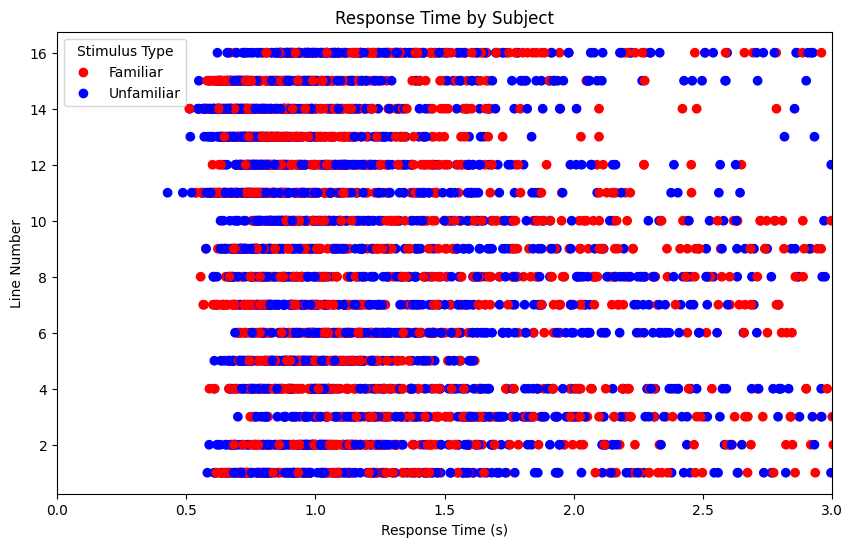

In [10]:
import matplotlib.pyplot as plt
# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Iterate through the 16 CSV files
for subject_id in range(1, 17):
    subject = f"sub-{subject_id:02d}"
    path = f"/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/{subject}/ses-meg/beh/{subject}_ses-meg_task-facerecognition_events.tsv"
    df = read_csv(path, sep ='\t')  # Load CSV data
    # Extract response times and stim_file values
    response_times = df['response_time']
    stim_files = df['stim_file']
    y =[subject_id for i in range(len(response_times))]
    # Define color based on stim_file contents
    colors = ['red' if stim_file[4] == "f" else 'blue' for stim_file in stim_files]
    
    # Plot the response times with the specified color
    plt.scatter(response_times, y, c=colors, label=f'Subject {subject_id}')
plt.xlim(0, 3)
# Customize the plot
plt.xlabel('Response Time (s)')
plt.ylabel('Line Number')
plt.title('Response Time by Subject')
# plt.legend()
plt.legend(title='Stimulus Type', labels=['Familiar', 'Unfamiliar'])

# Show the plot
plt.show()

In [11]:
grouped_counts_u_length = {}
for count, lists in grouped_counts_u.items():
    grouped_counts_u_length[count]=len(lists)

In [12]:
grouped_counts_u_length

{14: 33, 8: 3, 13: 29, 15: 37, 16: 18, 11: 8, 12: 15, 9: 3, 10: 3, 7: 1}

In [13]:
{16: 18, 15: 37, 14: 33, 13: 29, 12: 15, 11: 8, 10: 3, 9: 3, 8: 3, 7: 1}

{16: 18, 15: 37, 14: 33, 13: 29, 12: 15, 11: 8, 10: 3, 9: 3, 8: 3, 7: 1}

In [14]:
{16: 3,  15: 9,  14: 8,  13: 15,  12: 12, 11: 22, 10: 8, 9: 14, 8: 22,  7: 11,  6: 5, 5: 5,  4: 3,  3: 5,  2: 3,  1: 1, 0: 2,}

{16: 3,
 15: 9,
 14: 8,
 13: 15,
 12: 12,
 11: 22,
 10: 8,
 9: 14,
 8: 22,
 7: 11,
 6: 5,
 5: 5,
 4: 3,
 3: 5,
 2: 3,
 1: 1,
 0: 2}

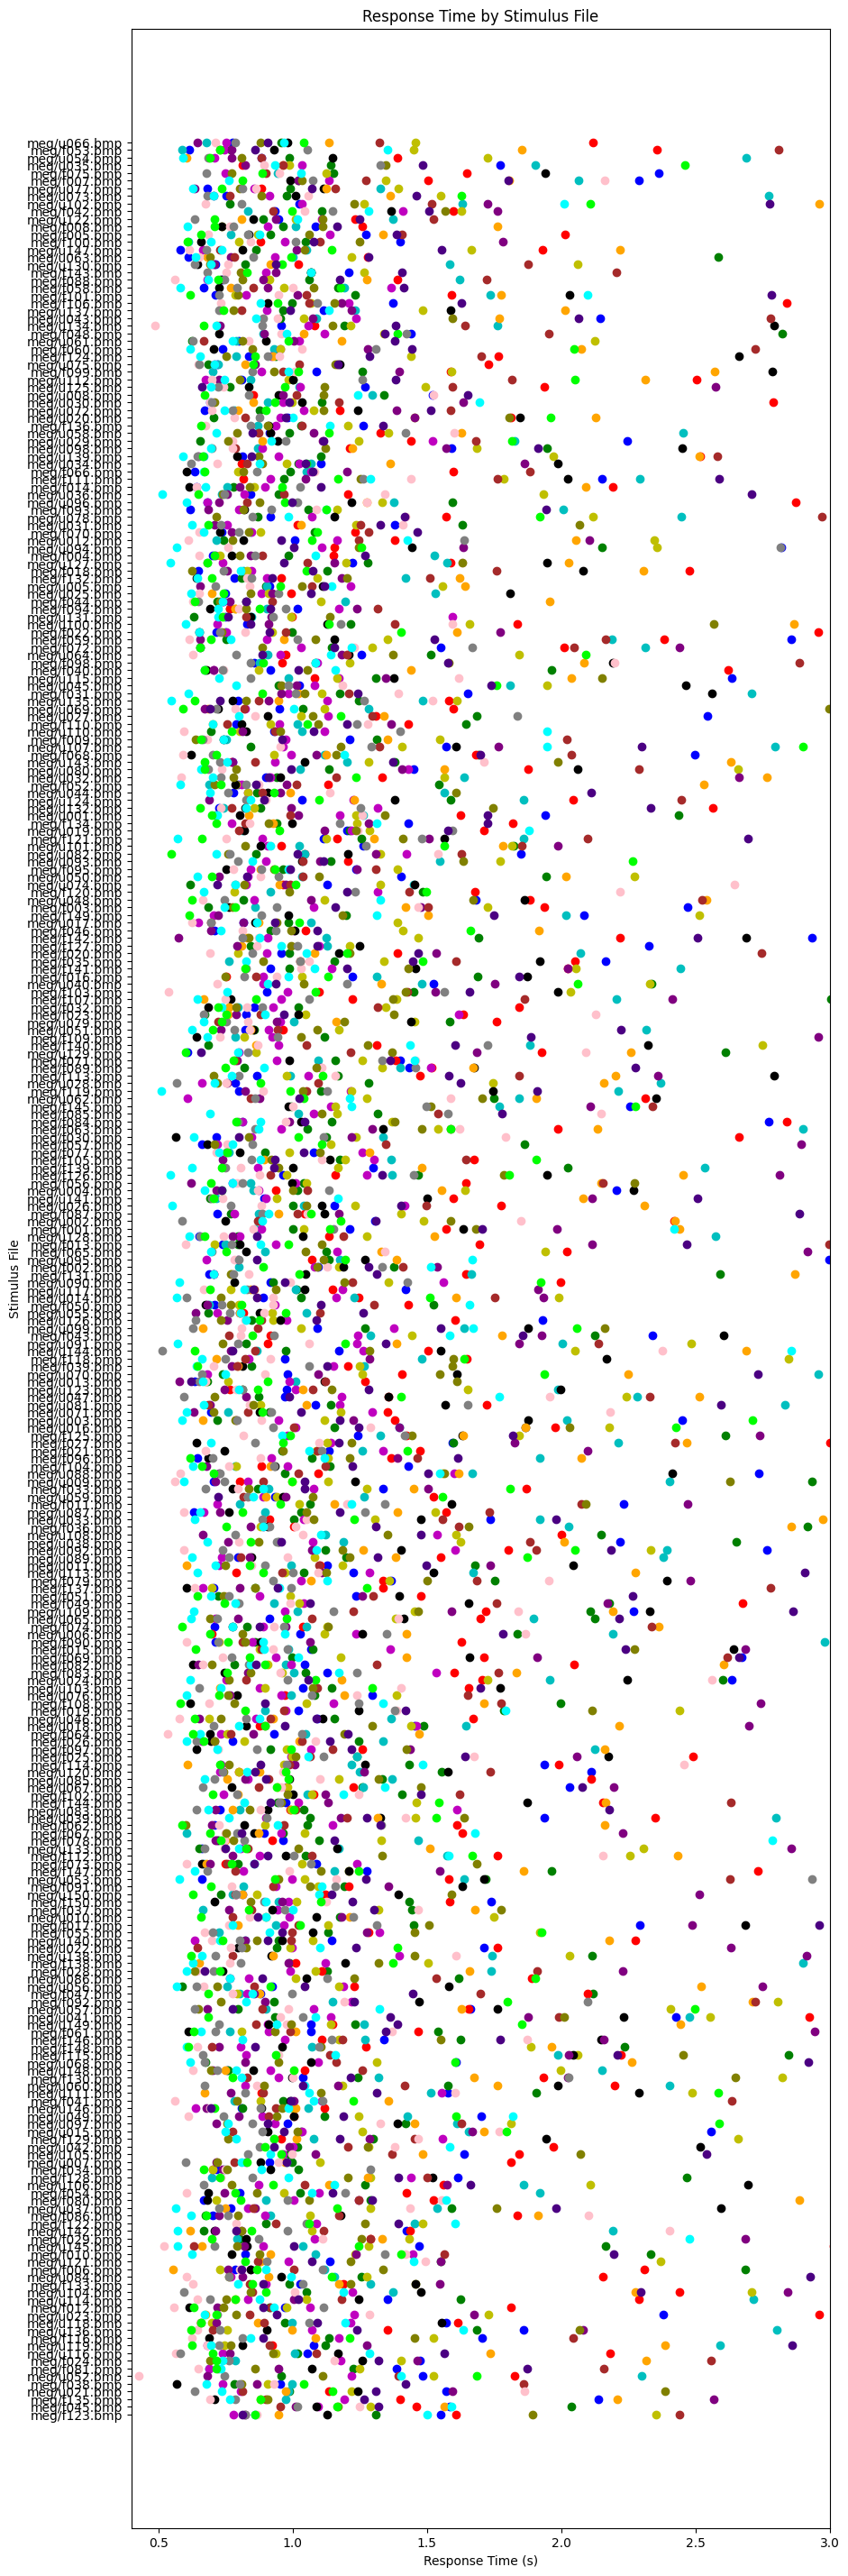

In [15]:
import matplotlib.pyplot as plt
from pandas import read_csv

# Define a list of distinct colors
subject_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'olive', 'gray', 'cyan', 'lime', 'indigo']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 36))
ax = plt.subplot()

# Iterate through the 16 CSV files
for subject_id in range(1, 17):
    subject = f"sub-{subject_id:02d}"
    path = f"/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/{subject}/ses-meg/beh/{subject}_ses-meg_task-facerecognition_events.tsv"
    df = read_csv(path, sep='\t')  # Load CSV data
    
    # Extract response times and stim_file values
    response_times = df['response_time']
    stim_files = df['stim_file']
    
    # Define y-values based on stim_file contents
    y_values = [stim_file for stim_file in stim_files]
    
    # Get the color for the current subject
    color = subject_colors[subject_id - 1]

    # Plot the response times with the specified color
    plt.scatter(response_times, y_values, c=color, label=f'Subject {subject_id}')

plt.xlim(0.4, 3)  # Set y-axis limits
# Customize the plot
plt.xlabel('Response Time (s)')
plt.ylabel('Stimulus File')
plt.title('Response Time by Stimulus File')
# plt.legend(title='Stimulus Type', labels=['Face (f)', 'Unfamiliar (u)'])

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from pandas import read_csv

# Define a list of distinct colors
subject_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'olive', 'gray', 'cyan', 'lime', 'indigo']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 36))
ax = plt.subplot()

# Iterate through the 16 CSV files
for subject_id in range(1, 17):
    subject = f"sub-{subject_id:02d}"
    path = f"/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/{subject}/ses-meg/beh/{subject}_ses-meg_task-facerecognition_events.tsv"
    df = read_csv(path, sep='\t')  # Load CSV data
    
    # Extract response times and stim_file values
    response_times = df['response_time']
    stim_files = df['stim_file']
    
    # Define y-values based on stim_file contents
    y_values = [stim_file for stim_file in stim_files]
    
    # Get the color for the current subject
    color = subject_colors[subject_id - 1]

    # Plot the response times with the specified color
    plt.scatter(response_times, y_values, c=color, label=f'Subject {subject_id}')



In [2]:
import matplotlib.pyplot as plt

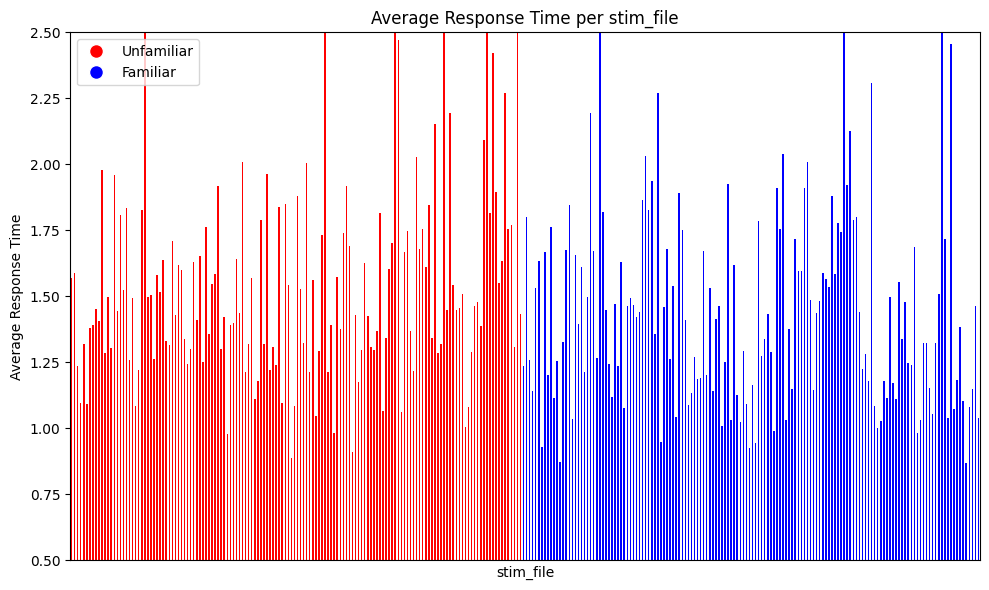

In [3]:
import pandas as pd
file_names= []
for subject_id in range(1, 17):
    subject = f"sub-{subject_id:02d}"
    path = f"/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/{subject}/ses-meg/beh/{subject}_ses-meg_task-facerecognition_events.tsv"
    file_names.append(path)
combined_data = pd.concat([pd.read_csv(file, sep='\t') for file in file_names])

# Step 2: Group and calculate the average Response Time (RT) for each unique stim_file
average_rt_per_stim = combined_data.groupby('stim_file')['response_time'].mean()
colors = ['red' if stim_file[4] == "f" else 'blue' for stim_file in average_rt_per_stim.index]

# Step 3: Plot the average RT per stim_file
plt.figure(figsize=(10, 6))
ax = average_rt_per_stim.plot(kind='bar', color=colors)
plt.title('Average Response Time per stim_file')
plt.xlabel('stim_file')
plt.ylabel('Average Response Time')
plt.xticks(rotation=45)
legend_labels = ['Unfamiliar', 'Familiar']
unique_colors = list(set(colors))
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(unique_colors, legend_labels)]
plt.legend(handles=custom_legend)

plt.ylim(0.5, 2.5)  # Set y-axis limit to 0.3
plt.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x ticks
plt.xticks([])  # Remove x-axis labels
plt.tight_layout()
plt.show()


1.2844375000000001


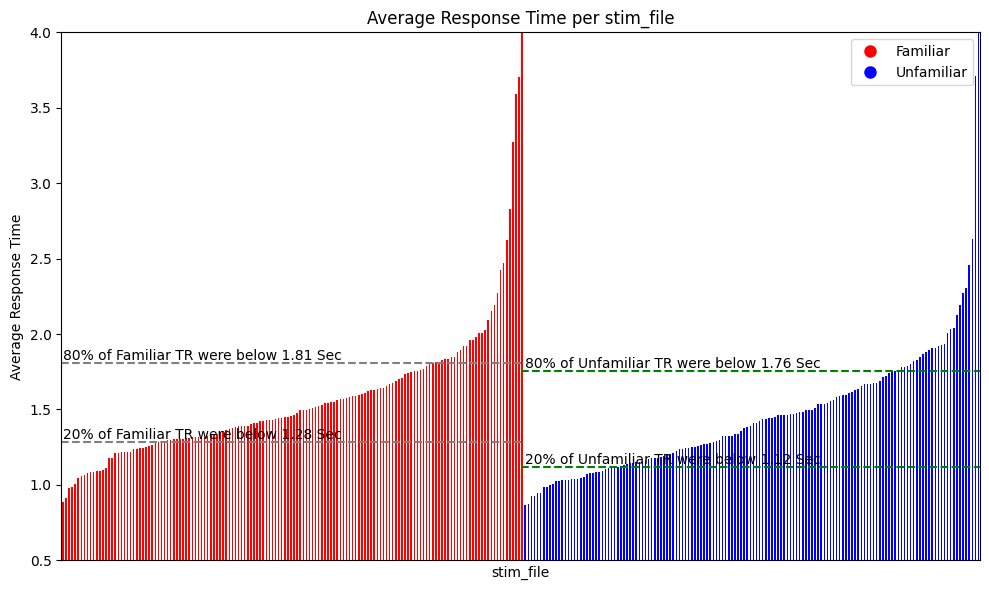

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from multiple files
file_names = []
for subject_id in range(1, 17):
    subject = f"sub-{subject_id:02d}"
    path = f"/Users/hamzaabdelhedi/Projects/data/MFRS_data/ds000117/{subject}/ses-meg/beh/{subject}_ses-meg_task-facerecognition_events.tsv"
    file_names.append(path)

combined_data = pd.concat([pd.read_csv(file, sep='\t') for file in file_names])

# Group and calculate the average Response Time (RT) for each unique stim_file
average_rt_per_stim = combined_data.groupby('stim_file')['response_time'].mean()
# Sort the data by average RT in ascending order
sorted_data_familiar = average_rt_per_stim[:150].sort_values(ascending=True)
sorted_data_unfamiliar = average_rt_per_stim[150:].sort_values(ascending=True)
print(sorted_data_familiar[int(150*0.2)])
colors = ['red' for i in range(len(sorted_data_familiar))]
colors.extend(["blue" for i in range(len(sorted_data_unfamiliar))])
# Identify the first 20% of both familiar and unfamiliar data
plt.figure(figsize=(10, 6))
sorted_data = pd.concat([sorted_data_familiar, sorted_data_unfamiliar])
# Plot the average RT per stim_file
ax = sorted_data.plot(kind='bar', color=colors)
plt.ylim(0.5, 4)  # Set y-axis limit to 0.3
plt.axhline(y=sorted_data_familiar[int(150*0.2)], xmax=0.5, color='grey', linestyle='--', label='20% Threshold')
plt.text(0.1, sorted_data_familiar[int(150*0.2)] + 0.02, f"20% of Familiar TR were below {sorted_data_familiar[int(150*0.2)]:.2f} Sec", color='black')
plt.axhline(y=sorted_data_familiar[int(150*0.8)], xmax=0.5, color='grey', linestyle='--', label='80% Threshold')
plt.text(0.1, sorted_data_familiar[int(150*0.8)] + 0.02, f"80% of Familiar TR were below {sorted_data_familiar[int(150*0.8)]:.2f} Sec", color='black')
plt.axhline(y=sorted_data_unfamiliar[int(150*0.2)], xmin=0.5, color='green', linestyle='--', label='20% Threshold')
plt.text(150, sorted_data_unfamiliar[int(150*0.2)] + 0.02, f"20% of Unfamiliar TR were below {sorted_data_unfamiliar[int(150*0.2)]:.2f} Sec", color='black')
plt.axhline(y=sorted_data_unfamiliar[int(150*0.8)], xmin=0.5, color='green', linestyle='--', label='80% Threshold')
plt.text(150, sorted_data_unfamiliar[int(150*0.8)] + 0.02, f"80% of Unfamiliar TR were below {sorted_data_unfamiliar[int(150*0.8)]:.2f} Sec", color='black')

plt.title('Average Response Time per stim_file')
plt.xlabel('stim_file')
plt.ylabel('Average Response Time')
plt.xticks([])  # Remove x-axis labels
legend_labels = ['Familiar', 'Unfamiliar']
unique_colors = list(set(colors))
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(unique_colors, legend_labels)]
plt.legend(handles=custom_legend)
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
np.mean(sorted_data_familiar)

1.6301804166666667

In [4]:
import numpy as np
np.mean(sorted_data_unfamiliar)

1.4958923141891893

In [5]:
from scipy import stats
t_statistic, p_value = stats.ttest_ind(sorted_data_familiar, sorted_data_unfamiliar, equal_var=False)


In [6]:
t_statistic

1.2962842969202224

In [7]:
p_value

0.19594996112210092